In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def function_for_roots(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c #finding the roots of ax^2 + bx + c 

Function to check if initial values are valid

Define bisection root finding search

In [3]:
def check_initial_values(f, x_min, x_max, tol):
    
    #check initial guesses
    y_min = f(x_min)
    y_max = f(x_max)
    
    #check that x_min and x_max contain a 0 crossing
    if(y_min*y_max>=0.0):
        print("no zero crossing found in the range = ",x_min,x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min,y_min,x_max,y_max)
        print(s)
        return 0
    
    #if x_min is root, then return flag == 1  
    if(np.fabs(y_min)<tol):
        return 1
    
    #if x_max is root, return flag == 2
    if(np.fabs(y_max)<tol):
        return 2
    
    #if we reach this point, the bracket is valid, and we will return 3
    return 3


def bisection_root_finding(f, x_min_start, x_max_start, tol):
    
    x_min = x_min_start
    x_max = x_max_start
    x_mid = 0.0
    
    y_min = f(x_min)
    y_max = f(x_max)
    y_mid = 0.0
    
    imax = 10000
    i = 0
    
    #checking initial values
    flag = check_initial_values(f,x_min,x_max,tol)
    if(flag==0):
        print("Error in bisection root finding().")
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        return x_min
    elif(flag==2):
        return x_max
    
    flag = 1

    while(flag):
        x_mid = 0.5*(x_min+x_max)
        y_mid = f(x_mid)
    
        if(np.fabs(y_mid)<tol):
            flag = 0
        else:
            #xmid isnt a root
            #if product of fxn @ midpoint at 1 end of points is>0, replace end point
            if(f(x_min)*f(x_mid)>0):
                x_min = x_mid
            else:
                x_max = x_mid
            
        print(x_min,f(x_min),x_max,f(x_max))
    
#count iteration
        i += 1

        if(i>=imax):
            print("Exceeded max # of iterations = ",i)
            s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (x_mid,f(x_mid))
            print(s)
            raise StopIteration('Stopping iterations after ',i)

    return x_mid, i

conduct the search

In [4]:
x_min = 0.0
x_max = 1.5
tolerance = 1.0e-6

print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

x_root, i_root = bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
y_root = function_for_roots(x_root)

s = "Root found with y(%f) = %f" % (x_root,y_root)
print(s)
print(i_root)

0.0 2.07
1.5 -0.2175000000000007
0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04090881347656

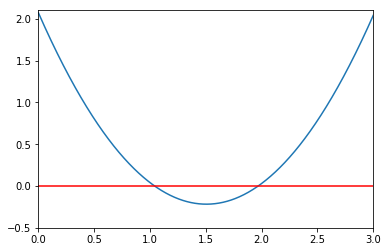

In [7]:
x=np.linspace(0,3,1000)

plt.plot(x,function_for_roots(x))
plt.xlim(0,3,)
plt.ylim(-0.5,2.1,)
plt.axhline(0, c='red')
plt.plot(x_root,i_root)